1. OS support for I/O devices
1. Block device stack
1. File system architecture

1. Have protocols: interfaces for device I/O
1. Have dedicated handlers: OS has device drivers, interrupt handlers ...
1. Decouple I/O details from core processing: abstract I/O device detail from applications
    

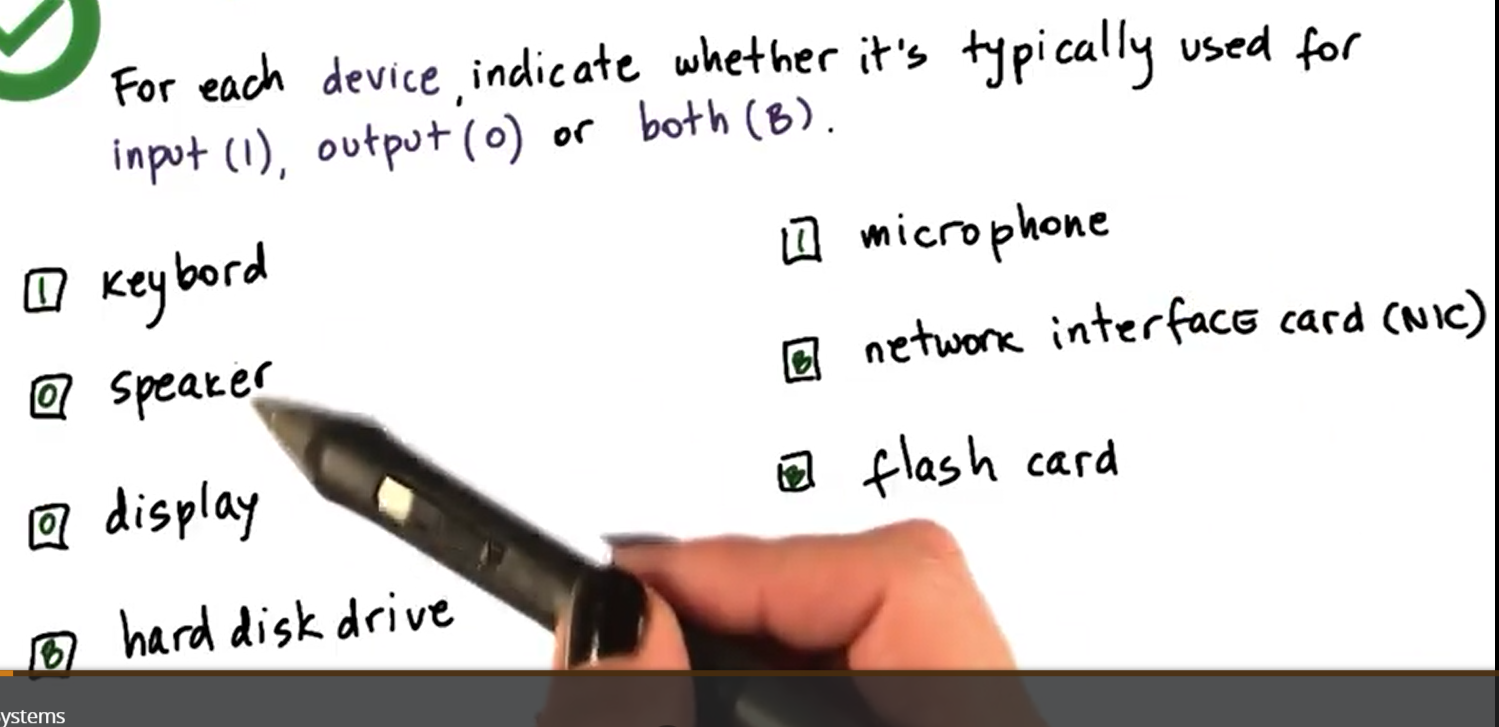

### Basic I/O device features
1. Control registers can be accessed by the CPU and permit CPU interactions
    1. command registers: cpu control device what to do
    1. data registers: cpu control data transfers 
    1. status registers: cpu to find out the what's happening on the device
1. Microcontroller = Device's CPU: control actions on the device
1. On device memory
1. Other hardware-specific Chips/logic
    1.e.g. analog to digital converters

### CPU - Device Interconnection
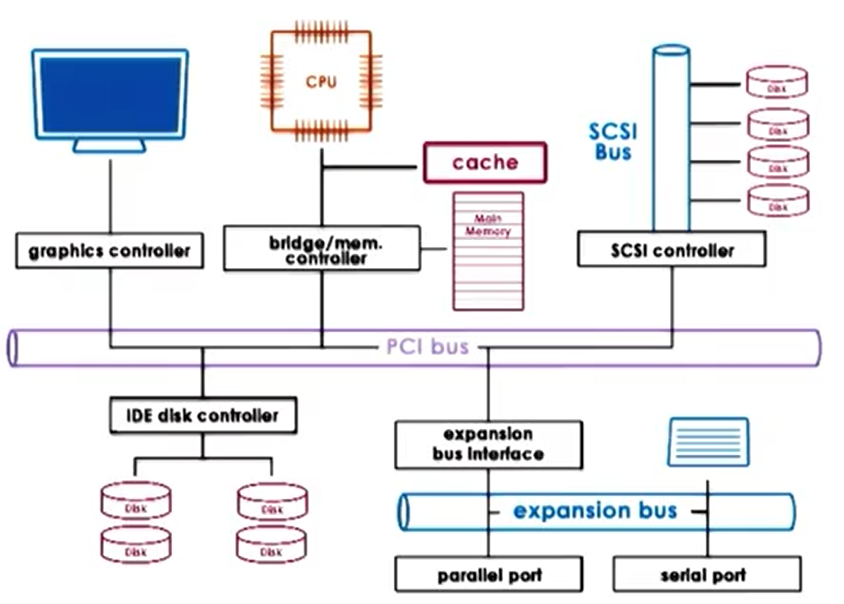
1. devices interface with the rest of the system via controller
1. device controller 
    1. typically integrated as part of the device packaging 
    1. used to connect the device with the rest of the CPU complex via some CPU device interconnect
    1. determine what type of interconnect can a device directly attach to
1. a number of different devices interconnected to the CPU complex via PCI bus (Peripheral Component interconnect)
1. PCI one of the standard medthos for connecting devices to the CPU
1. PCI Express (PCIe) > PCI-x (extended) > PCI
    1. more bandwidth
    1. faster
    1. lower access latency
    1. supports more devices
1. SCSI bus: connect SCSI disks
1. peripheral bus: keyboard etc
1. bridge controller handle differences between different types of interconnect

### Device Drivers
1. OS supports devices via device drivers
1. per each device type
1. responsibel for device access, management and control
    1. logic taht determins how can requests be passed from the higher levels of the system software application to the actual device
    1. how can the system respond to device-level events like errors or response notifications, or othe status change information
    1. any device-specific details regarding the device configuration or operation
1. provided by device manufacture per OS/version
1. each OS standardizes interfaces by provide some device driver framework
    1. interface for interaction with devices and development and integration of device drivers
    1. device independence
    1. device diversity

### Types of Devices
1. Block: disk 
    1. operate on the granularity of entire blocks of data delivered in and out of the device/CPU complex 
    1. read/write blocks of data
    1. direct access to indiviudal arbitrary block
        1. if you have 10 blocks of data on disk, you can reqest directly access the ninth one
    1. driver should support operations to read/write block of data
1. charactor devices: keybaord
    1. get/put character
    1. driver should support operations to put/get a character from/into the device
1. Network devices
    1. between the two types of devices above
    1. deliver more than a character at a time
    1. granularity is not necessarily a fixed block size
    1. can be more flexible
    1. a stream of data chunks of potentially different sizes
1. Interface from the OS to the devices are standardized based on the type of the devices
1. Internally, the OS maintains some representation for each of the devices avaiable on the platform
    1. done by using a file abstraction ro represent diffrerent devices
    1. OS can use any of the other mechanisms part of the OS to manipulate files to access different types of devices
    1. operations will be handled in some device-specific manner
1. UNIX-like systems
    1. /dev: all devices
    1. tmpfs: handle read/write special files
    1. devfs: handle read/write special files
    

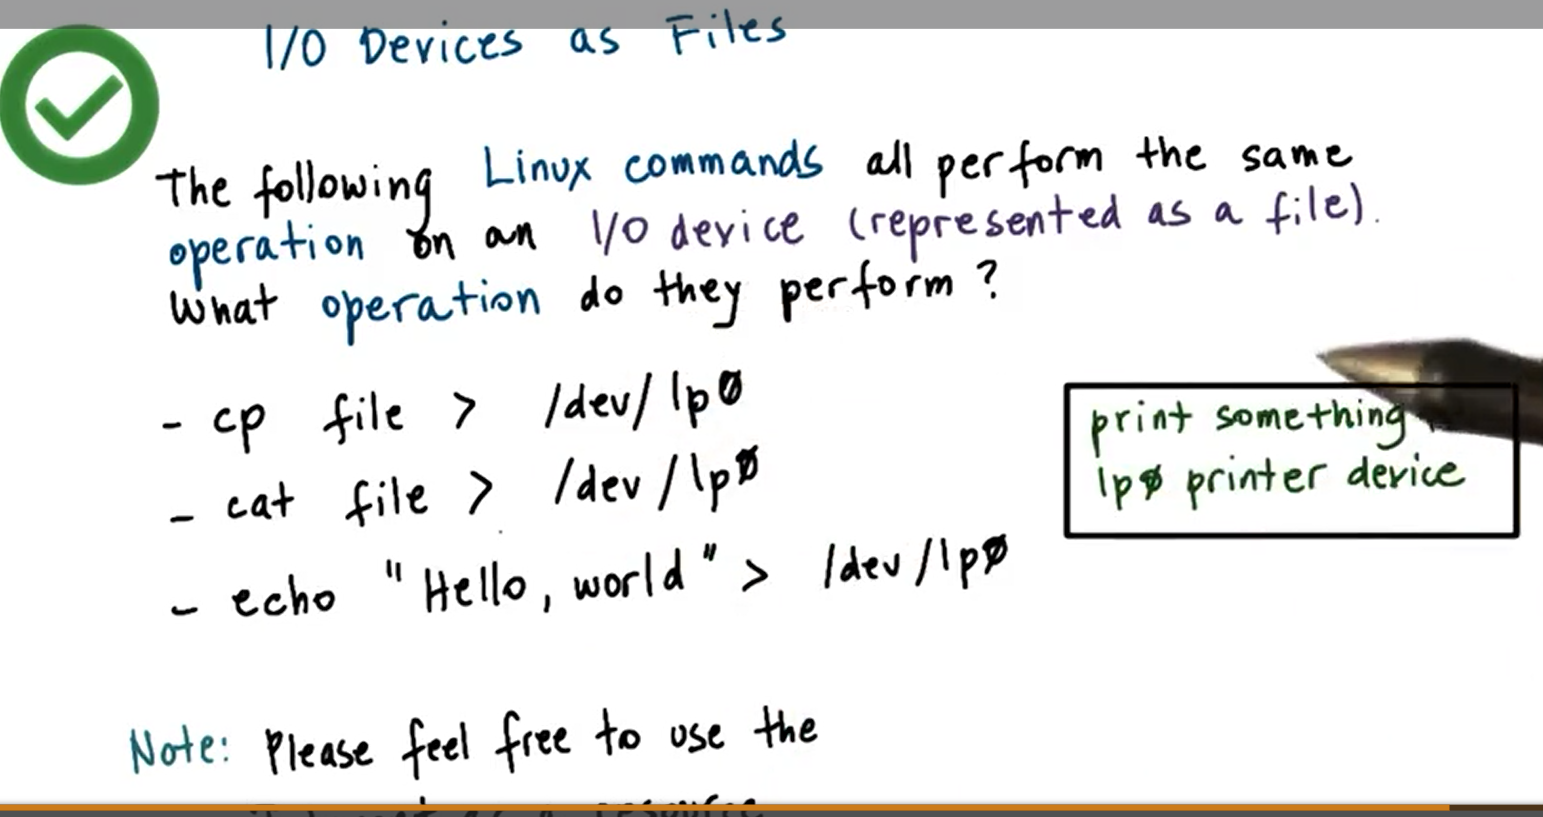
1. lp: line printer
1. 0: first line printer identified by the Linux system

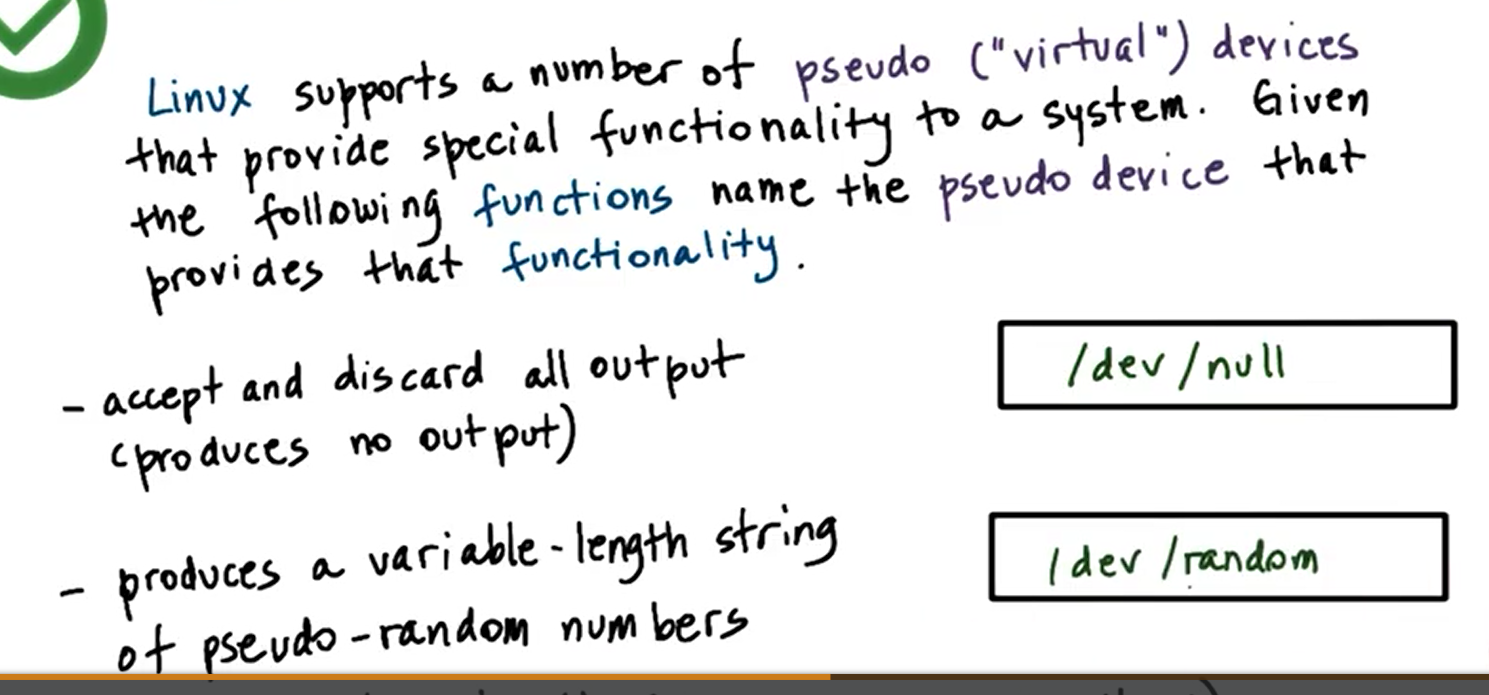

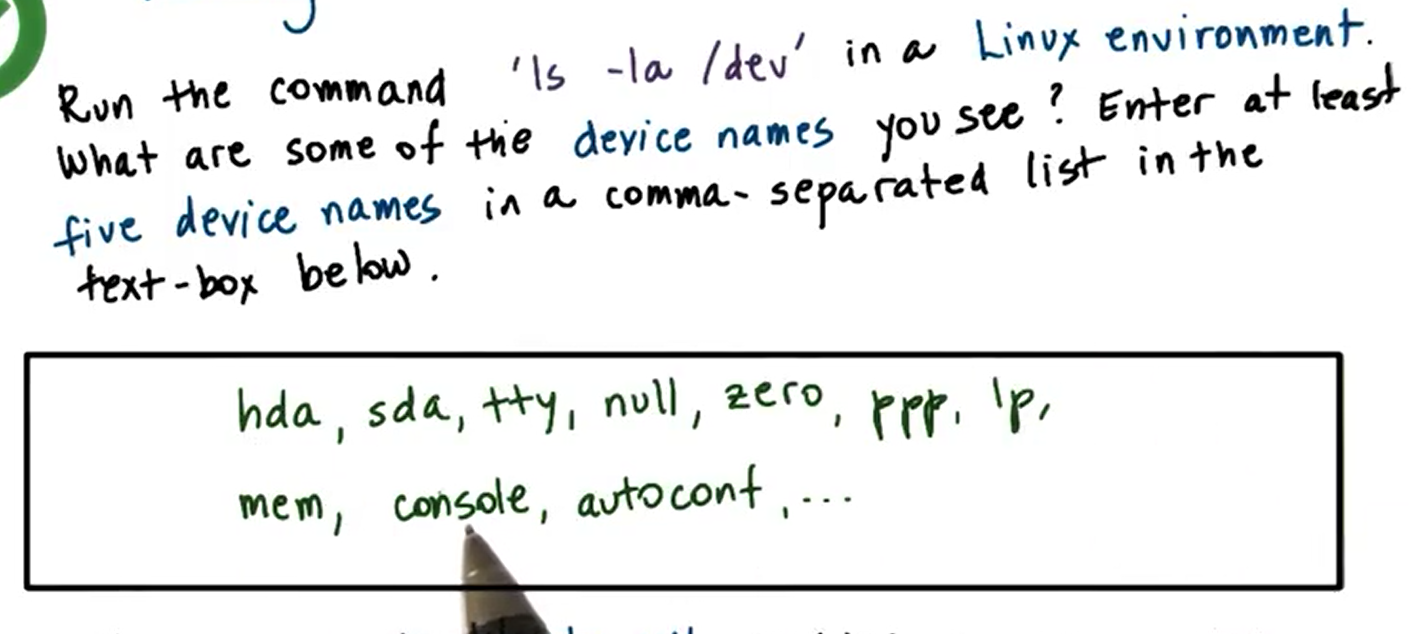
1. hda, sda: hard drives
1. tty: terminal station speical devices (piple output to/from terminals)
1. lp: printer

### CPU - Device Interaction
1. access device registers == memory load/store
    1. when CPU writes to these locations, the integrated memory PCI controller realizes the access should be routed to the device
    1. memory-mapped I/O
        1. part of the 'host' physical memory is dedicated for interactions with the devices
        1. portion of the memory reserved for the interaction is controlled by a specific set of registers: Base Address Registers (BAR)
            1. how much memory
            1. starting at which address
            1. used by which devices
            1. configured during the boot process
            1. determined by the PCI configuration protocol
    1. I/O port model
        1. dedicated in/out instructions for deviced access by CPU
        1. each instruction has to specify the target device (I/O port) 
        1. value stored in register (value need to be written/read to/from the device
1. path from devicde to the CPUs complex takes two routes
    1. device can generate interrupts to the CPU
        1. pros:
            1. to trigger an interrupt as soon as the device has something to do (notification, data. etc.)
        1. cons:
            1. interrupt handler steps: certain operations like settings and resettings the interrupt mask depending on what kinds of interrupts are allowed
            1. indiret effects due to cache polution related to the execution of the handler
    1. CPU polls the device by reading its status register
        1. to determine does the device has some data for the CPU
        1. device have a response to a request sent to the CPU
        1. other informaiton
        1. pros:
            1. CPU decides when it will poll at some convenient times
            1. some cache pollution won't be too bad
            1. some overheads will be removed
        1. cons:
            1. delays
            1. overhead (for continously polling)
    1. overhead with both methods and tradeoff between the two, should be selected depending on 
        1. the kind of device, 
        1. the objectives
        1. the characteristics of teh load of the device (input/output data rate)

### Programmed I/O (PIO)
1. with pci and PCI controller on the device, a system can access or request an operation from a device with programmed I/O
1. requires no additional hardware support
1. CPU issuing constructions by writing into the command registers of the device
1. control data movement by accessing the data registers of the device
1. example: NIC, data == network packet
    1. write command to request packet transmission (perform transmission)
    1. copy packet to data register
    1. repeat until packet sent
    1. register
    1. data register may be smaller than the data packet
        1. e.g. 1200b packet, 8byte register
            1. 1 (for bus command) 
            1. 188 (for data)
            1. 189 CPU store instructions

### Direct Memory Access (DMA)
1. relies on DMA controller
1. CPU "program" the device
    1. via command registers
    1. via DMA controller
    1. data movement via configuring DMA controller between CPU memory and device
1. NIC with DMA, data = network packet
    1. write command to request packet transmission
    1. configure DMA controller with in-memory address and size of packet buffer
    1. 1200b packet, 8byte register or bus
        1. 1 store instuction
        1. 1 DMA configure
        1. less steps, but DMA configuration is more complex (take many cycles)
        1. for small transfer PIO still be better than DMA
1. For DMAs
    1. data buffer must be in physical memory until transfer completes
    1. can't be swapped out to disk, because DMA can read/write only from/to memory
    1. pinning memory regions (non-swappable)

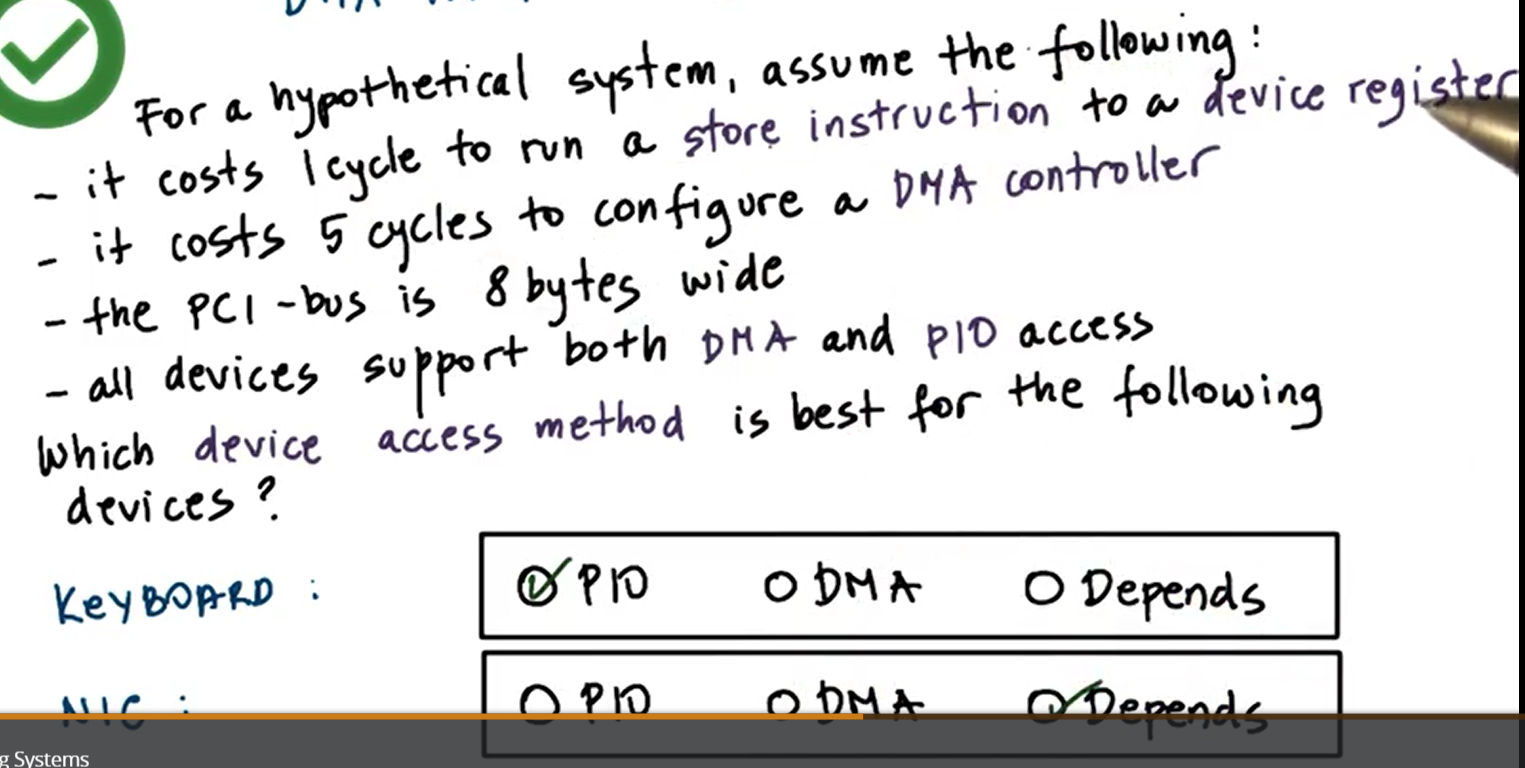

### Typical Device Access
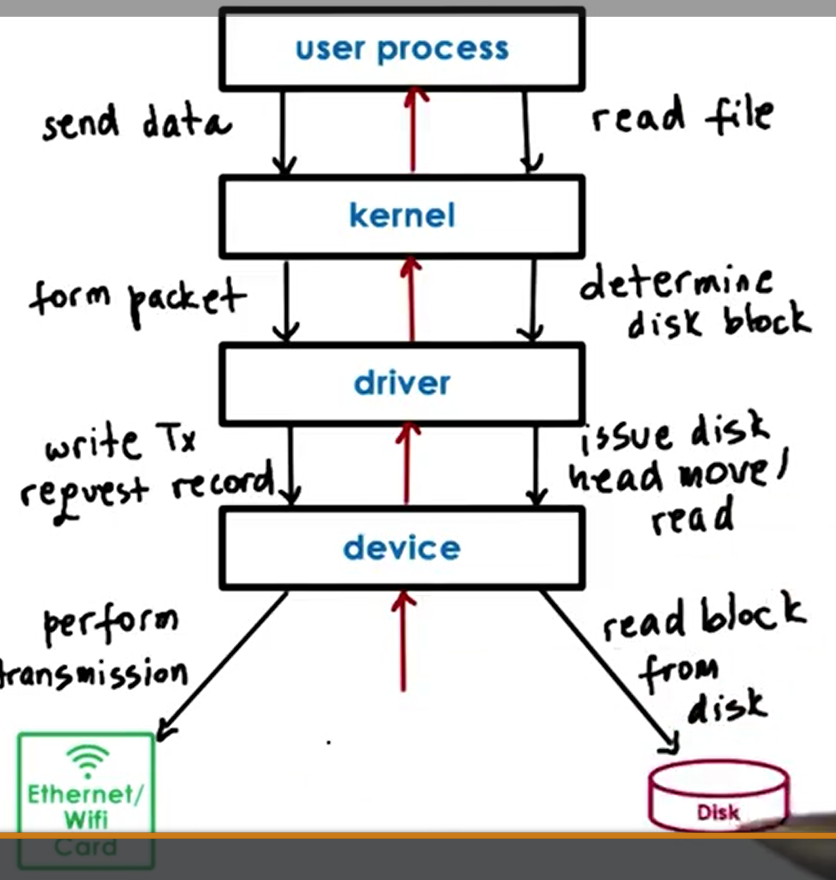
1. System call (from user process to kernel)
1. in-kernel stake (from kernel to driver)
1. driver invocation
1. driver request device request configurateion
1. device perform request

### Do we have to go through the OS
1. OS Bypass
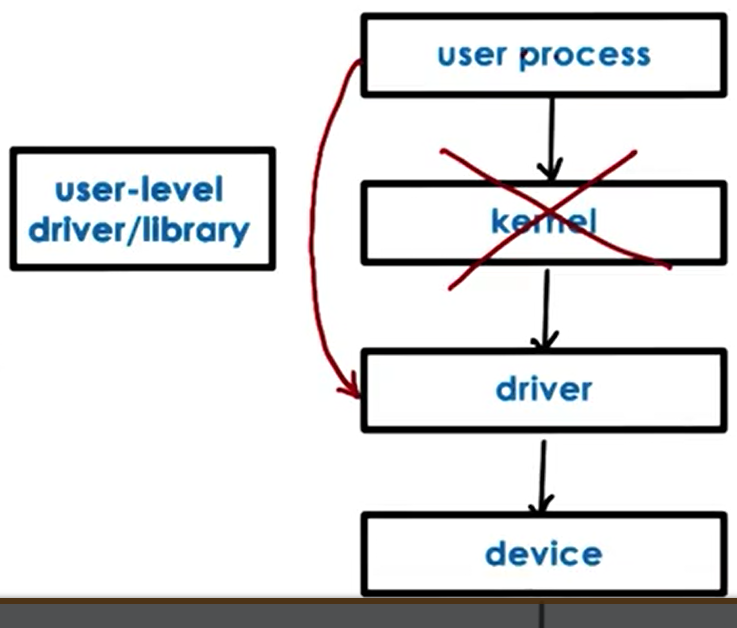
    1. device register/data directly accessible
    1. OS configures then out-of-the-way
    1. user-level driver (~ library)
    1. OS retains coarse-grain control
        1. enable/disable device
        1. adding permissions
        1. add more processes to use
    1. relies on device features
        1. sufficient registers for both user operation and kernel controls
        1. demux capability (device need to pass back the data to the right process) (kernel used to do this, now device need to do this)

### What happends to a calling thread
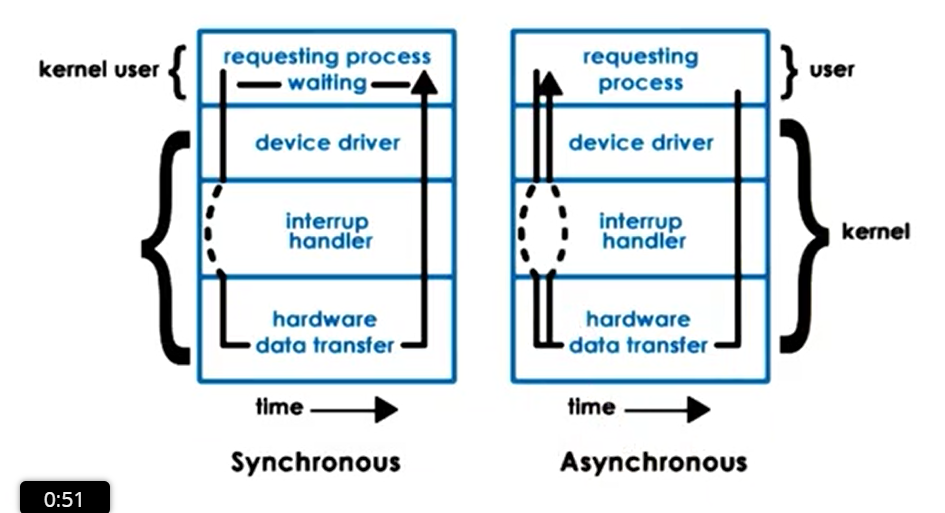
1. synchronous I/O operations
    1. process blocks
1. asynchronous I/O operations
    1. process continues
    1. later
        1. polling: process checks and retrieves retulsts
        1. interrupt: process is notified that the operation completed and results are ready

### Block device stack
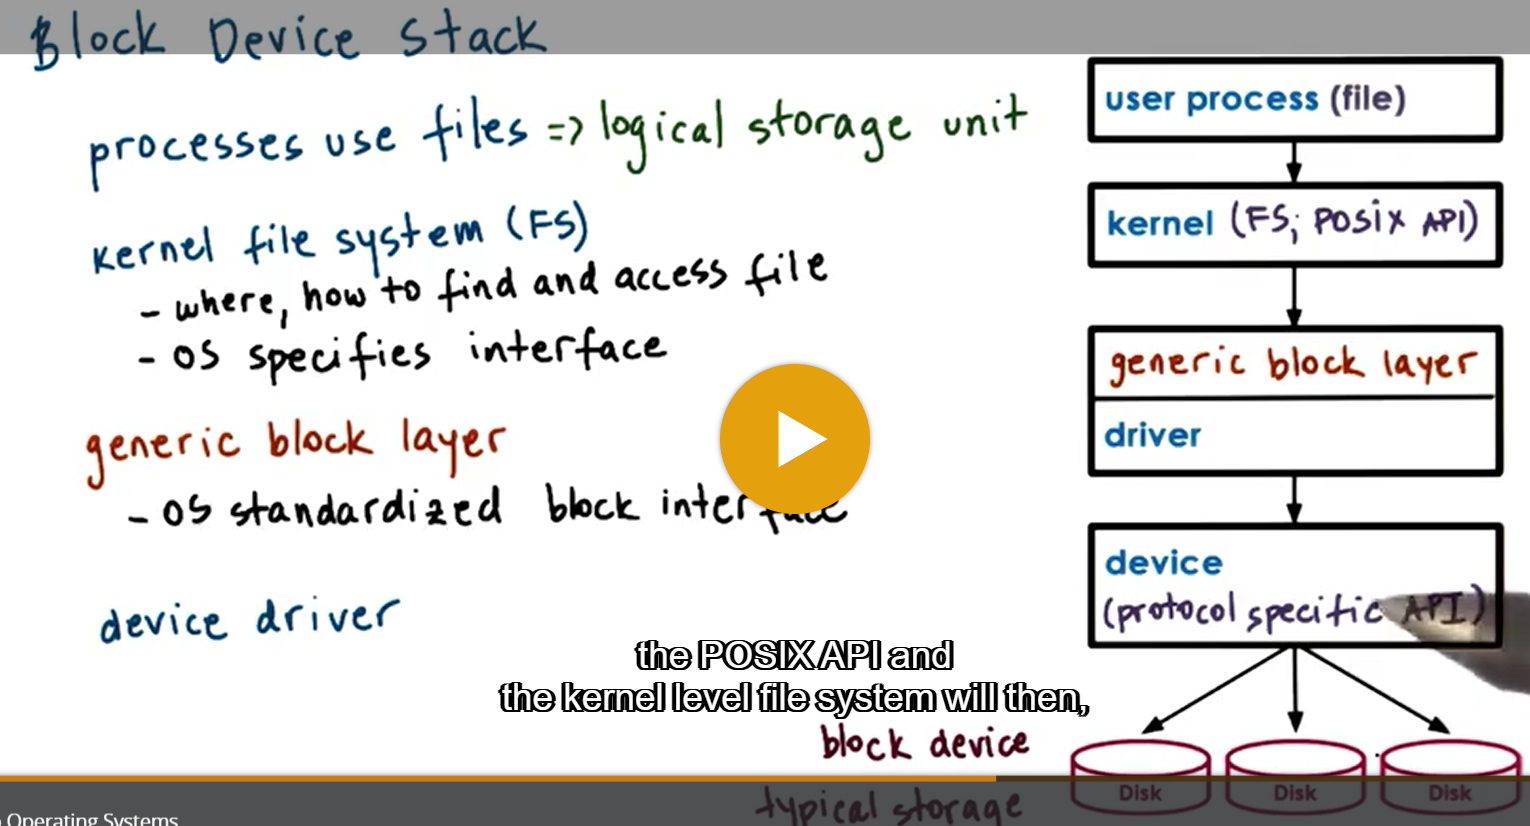
1. processes use files => logical storage unit
1. block devices typical storage for files  
1. typical storage related abstraction used by applciation is a file 
1. file is mapped to some underlying physical storage location
1. at the top most level, the applications don't think about the disks/issue operations on disks
1. they request operations performed on files
1. below the files based interface is the file system
1. Kernel file system (FS)
    1. where, how to find and access file
    1. what's the particualr portion of that file needs to be accessed
    1. permission check
    1. initiate the actual access
    1. OS specifies interface
        1. used by application to interact with the file system, 
        1. norm is POSIX API
        1. standardizing the interface means there would be certain standard APIs in terms of how the file systems interact with the underlying storage devices
    1. OS allows a file system to be modified or replaced 
1. generic block layer
    1. OS standerdized block interface for all types of block devices (abstract different hardware)
1. Device driver
    1. if files are stored on block devices, actual interaction require certain protocol specific APIs

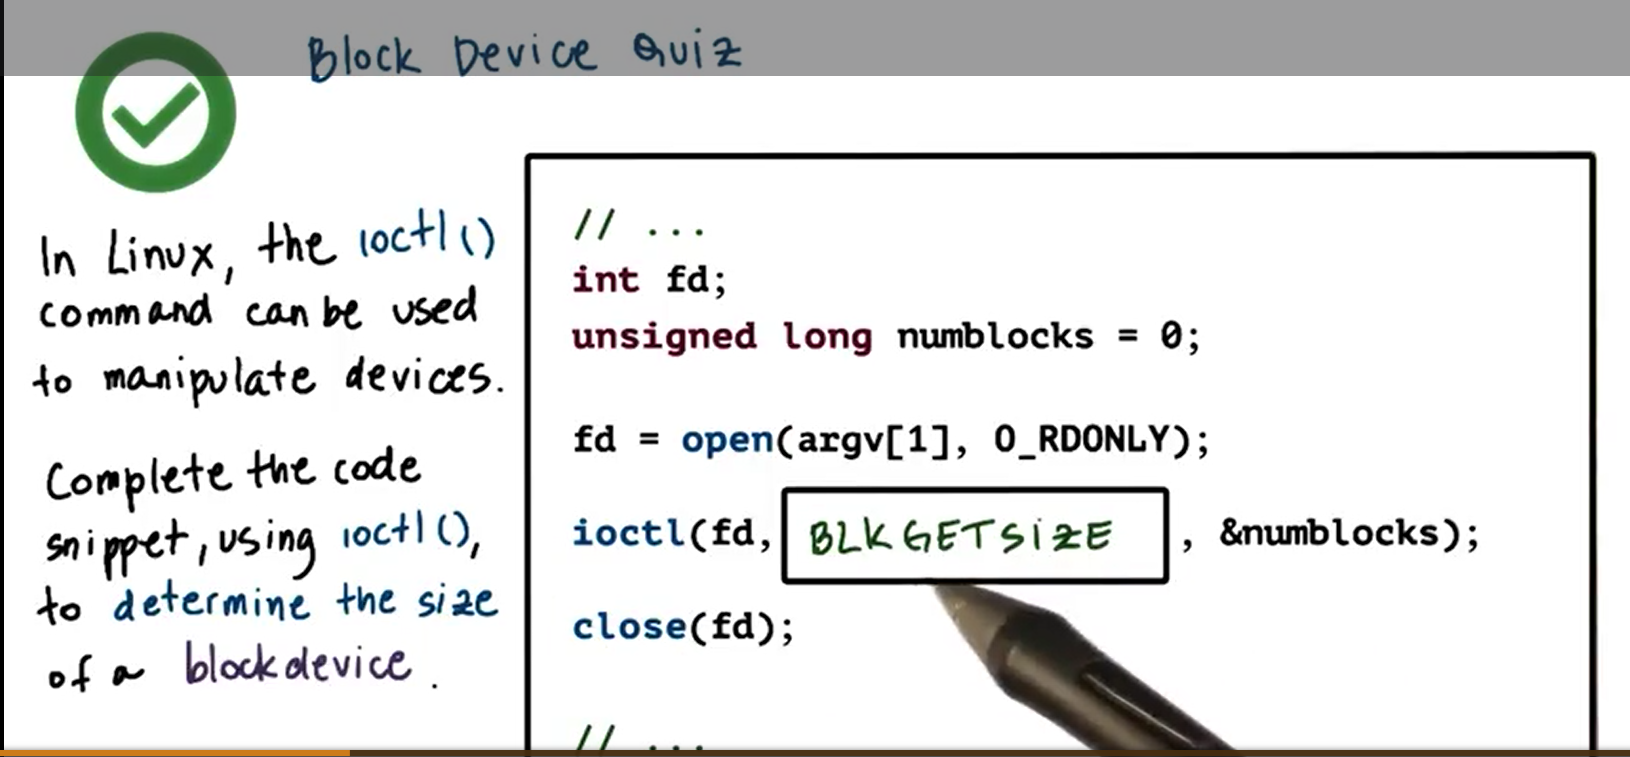

### Virtual File System
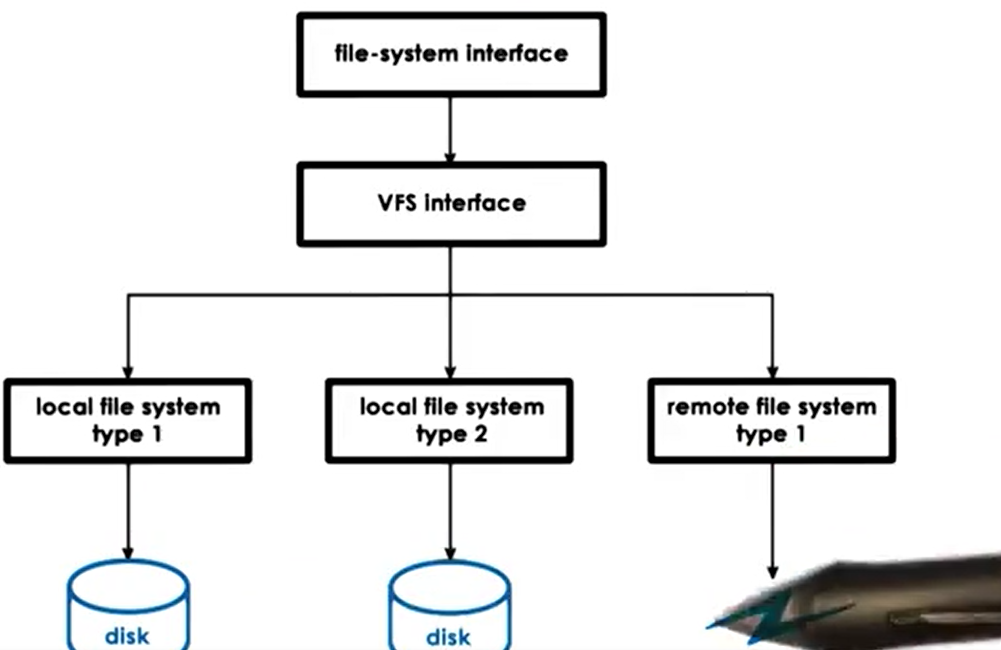
1. What is files are on more than one device
1. What if device(s) work better with differnt file system implementation?
1. What is fiels are not on a local device (accessed via network)?
1. hide applications from the details of underlying file system
1. still use the same API (POSIX)
1. VFS will specify a more detailed set of all system related abstractions that every single one of the underlying file system must implement so that it can perform necessary translations

### Virtual File System Abstractions
1. file == elements on which the VFS operates
1. file descriptor == OS representation of file to identify the file
    1. open
    1. read
    1. write
    1. send fiel
    1. lock 
    1. close
1. inode == persistent representation/data structure of file "index"
    1. standard data structure in Unix systems
    1. list of all data blocks for the file (as an index for the file)
        1. files don't need to be stored contiguously on disk
    1. device 
    1. permission
    1. size
    1. if locked
    1. ...
1. directory is just a file
1. dentry == directory entry (data structure)
    1. corresponds to single path component that's being traversed as we try to reach a particular file
    1. /user/ada, we have to traverse /users/ada
        1. VFS will create a dentry element for every path compnent
            1. /
            1. /users
            1. /users/ada
    1. when we need to file another file under the same folder, we don't have to go through the entire path and reread the file from parent folders
    1. dentry cache: for all directory entries they have visited
    1. soft-state: no persistent on-disk representation of the dentry objects, only maintained b y the OS in memory
1. superblock == file system-spefic information regarding the file system layout
    1. like a map the file system maintains to figure out how has it organized on disk the various persistent data element
        1. inodes
        1. data blocks
    1. additional metadata
    1. what stored and how stored different among file systems
        

### VSF on Disk
1. VFS data structures are software entities
1. created and maintained by OS file system component
1. other than dentry, the remianing components actually correspond to blocks on disk
1. file => data locks on disk 
1. inode => track files' block
    1. also resides on disk in some block
1. superblock => overall map of the disk blocks
    1. inode blocks
    1. data blocks
    1. free blocks
        1. used for allocation when we need to find free blocks

### ext2: Second Extended File System
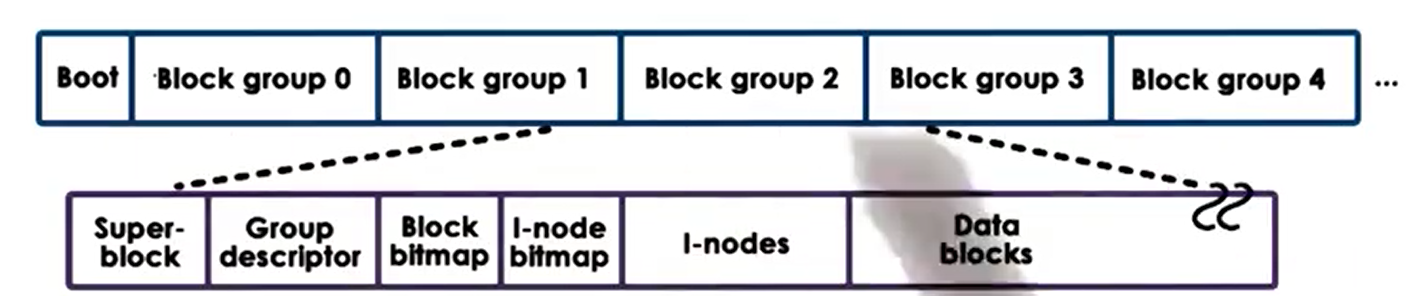
1. First block, block 0, is not used by Linux, often contains the code to boot the computer
1. the rest of this partition is divided into groups 
1. size of the groups has nothing to do with the physics of the disk
1. Each of the block gorups will be organized as 
    1. Super Block: the first block in Block Group
        1. number of inodes
        1. number of disk blocks
        1. starts of free blocks
    1. overall state of the block group is further described in the gorup descriptor
        1. information about the location of the bitmaps 
        1. total number of free nodes
        1. total number of directories in the system
        1. useful when files are being allocated (ext2 tried to balance the overall allocation of directories and files across the determined Block Groups.
    1. bitmaps => tracks free block and free inode
        1. for every single inode in this particular group and every single data block, the bitmap will be able to tell the upper layer allocators whether that inode component or the data block are free or used by some other file or directory
    1. inode
        1. numbered from 1 up to some maximum number 
        1. every inode in ext2 is 128byte data structure
        1. describes one file
        1. information
            1. owner of the file
            1. account information system call like stat would return
            1. how to locate the actual data blocks
    1. data block => file data

### inodes
1. index of all disk blocks corresponding to a file
1. file => uniquely identified by inode
    1. inodes are uniquely numbered
    1. the number identifier of the inode to identify a file
1. inode => list of all blocks + other metadata (check if access legal, update the status of the file: locked/unlocked)
1. pros:
    1. easy to perform sequential or random access (based on block size to find which block need to be found)
1. cons:
    1. limit on file size: total number of blocks with the linear data structure
    1. 128 B inode, 4 bytes block pointer
        1. 32 addressible block x 1kb block
        1. 32 kb fiel size 

### Inode with indirect pointers
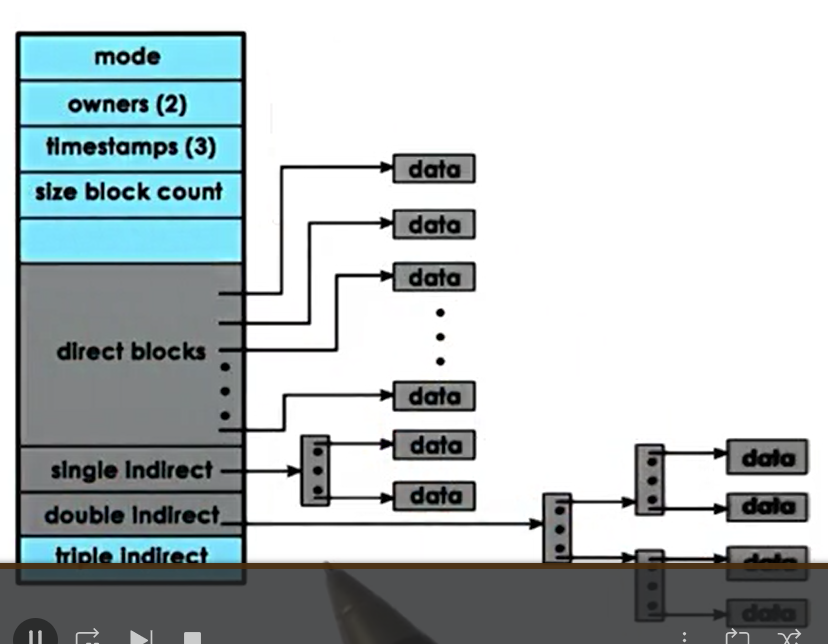
1. index of all disk blocks corresponding to a file
1. contains 
    1. meta data
    1. pointers to blocks
        1. direct pointers: list of pointers directly point to a block on disk storing the files' data
        1. indirect pointers: point to block of pointers
            1. 1kb block
            1. 4 byte pointer
            1. one indirect printer can point 256 blocks or 256 kilowbytes of file content
        1. Double indirect pointer: block of block of pointers
            1. 64 MB
        1. tripple ...
1. pros:
    1. small inode
    1. large file size
1. cons:
    1. file access slowdown
        1. direct pointer => 2 disk accesses
        1. double indirect pointer => up to 4 disk accesses

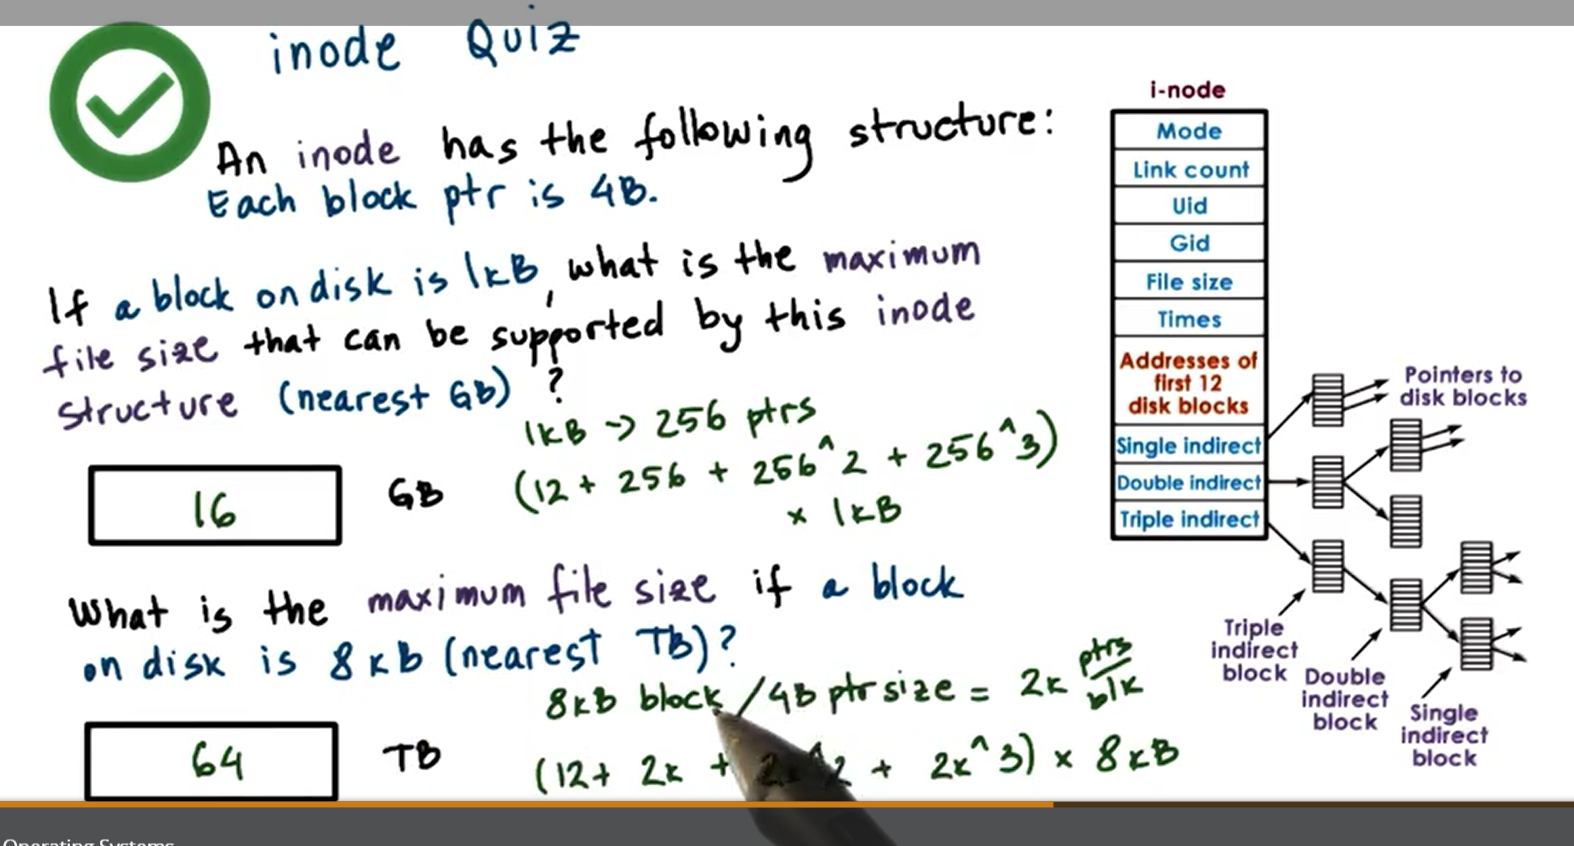

### Reducing File Access Overheads/Latency
1. caching/buffering => reduce number of disk accesses
    1. buffer cache in main memory 
    1. read/write from cache
    1. periodically flush to disk - fsync()
    1. amotize the cost of performing a disc access over multi intermittent writes that will hit the cache
    1. file systems support this operation with fsync system call
1. I/O scheduling => reduce disk head movement
    1. maximize sequential vs random access
    1. e.g. write block 25, write block 17 => write block 17, 25 (reorderd)
1. prefetching => increases cache hits
    1. leverage locality
    1. e.g. read block 17 => read also 18, 19
    1. use up more disk bandwidth
    1. reduce the access latency by increasing the cache hit rate
1. journaling/logging => reduce random access (ext3, ext4)
    1. describe write in log: block, offset, value...
    1. periodcally apply updates to proper disk locations